<CENTER>
</br>
<p><font size="5"> Nathan Sanglier </span></p>
<p><font size="4">  Image Processing </font></p>
<p></p>
<p><font size="5"> Image Denoising using Singular Value Decomposition </font></p>
</p></br>
</p>
</CENTER>

----------------------------

##  <span style="color:#00B8DE"> 0 - Imports </span><a name="PCA-denoising"></a>

In [1]:
using Plots
using LinearAlgebra
using Statistics

##  <span style="color:#00B8DE"> I - Problem </span><a name="PCA-denoising"></a>

> We generate $nb\_images= 50$ images representing the same function $f(x,y)=1_{\{x^2+y^2\leq 1\}}(x,y)$ over the area $[-1.2,-1.2]\times[1.2,1.2]$, each in the presence of white Gaussian noise with variance 1. 
> We will use SVD to get a better image out of these.

### Generation & Plot of Images

In [73]:
function f(x, y)
    if x^2 + y^2 <= 1
        return 1
    else
        return 0
    end
end;

In [74]:
function generate_noisy_img(x, y, variance)

    z = f.(x', y) + (randn(length(y), length(x)) * sqrt(variance))
    
    return z
end;

In [75]:
function plot_img(img)
    return heatmap(img, color=:grays, size=(300, 300), axis=false, colorbar=false)
end;

In [76]:
width, height = 100, 100
x_min, x_max = -1.2, 1.2
y_min, y_max = -1.2, 1.2
variance = 1

x, y = range(x_min, x_max, width), range(y_min, y_max, height)

nb_images = 50
array_noisy_img = zeros(height, width, nb_images)
for i in 1:nb_images
    array_noisy_img[:, :, i] = generate_noisy_img(x, y, variance)
end

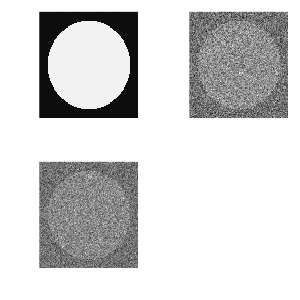

In [77]:
init_img = f.(x', y)
noisy_img_1 = array_noisy_img[:, :, 1]
noisy_img_2 = array_noisy_img[:, :, 2]

plot_init_img = plot_img(init_img)
plot_noisy_img_1 = plot_img(noisy_img_1)
plot_noisy_img_2 = plot_img(noisy_img_2)

plot(plot_init_img, plot_noisy_img_1, plot_noisy_img_2, size=(300, 300))

### Singular Value Decomposition

In [79]:
array_flat_noisy_img = reshape(array_noisy_img, height*width, nb_images)
U, sing_values, V = svd(array_flat_noisy_img);

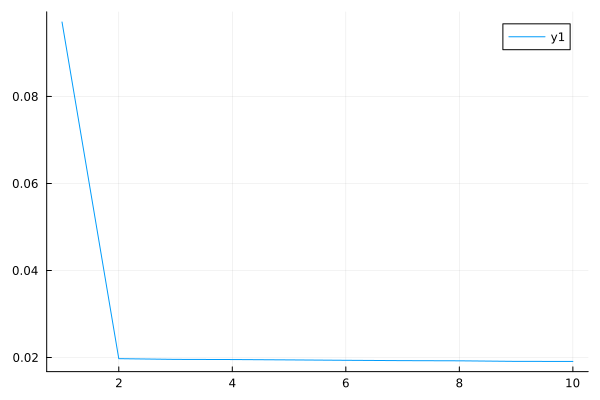

In [80]:
sing_values_contrib = sing_values/sum(sing_values)
plot(sing_values_contrib[1:10])

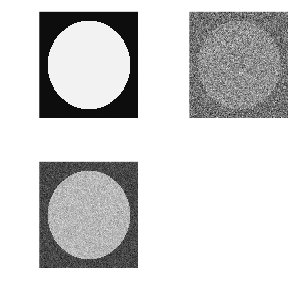

In [81]:
k = 1  # nb of singular values to keep
denoisy_img_flat = mean(U[:, 1:k] * Diagonal(sing_values[1:k]) * V[:, 1:k]', dims=2)
denoisy_img = reshape(denoisy_img_flat, height, width)

plot_denoisy_img = plot_img(denoisy_img)
plot(plot_init_img, plot_noisy_img_1, plot_denoisy_img, size=(300, 300))

### Average of Images

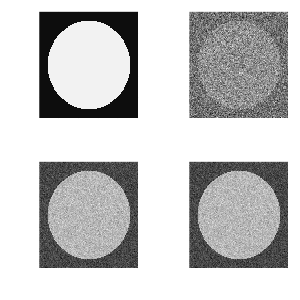

In [83]:
mean_noisy_img = mean(array_noisy_img, dims=3)[:, :, 1]

plot_mean_noisy_img = plot_img(mean_noisy_img)
plot(plot_init_img, plot_noisy_img_1, plot_denoisy_img, plot_mean_noisy_img, size=(300, 300))

In [84]:
cor_init_mean = cor(vec(init_img), vec(mean_noisy_img))
println("Correlation of Initial Image with Mean of Noisy Images = $(round(cor_init_mean, digits=5))")

Correlation of Initial Image with Mean of Noisy Images = 0.96222


### Adding Other Noise

In [85]:
function generate_noisy_img_v2(x, y, variance)

    z = f.(x', y) * randn() + (randn(length(y), length(x)) * sqrt(variance))
    
    return z
end;

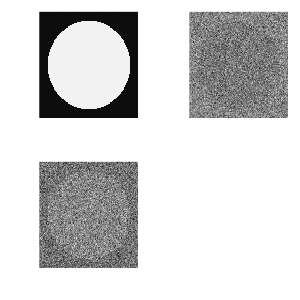

In [86]:
array_noisy_img_v2 = zeros(height, width, nb_images)
for i in 1:nb_images
    array_noisy_img_v2[:, :, i] = generate_noisy_img_v2(x, y, variance)
end

noisy_img_v2_1 = array_noisy_img_v2[:, :, 1]
noisy_img_v2_2 = array_noisy_img_v2[:, :, 2]

plot_noisy_img_v2_1 = plot_img(noisy_img_v2_1)
plot_noisy_img_v2_2 = plot_img(noisy_img_v2_2)

plot(plot_init_img, plot_noisy_img_v2_1, plot_noisy_img_v2_2, size=(300, 300)) #layout=(1, 3) si on veut les mettre en ligne

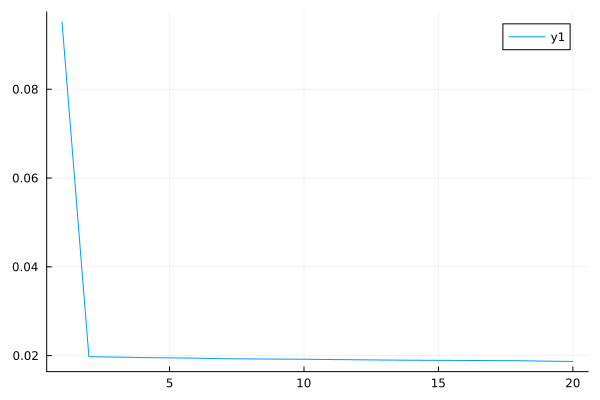

In [87]:
array_flat_noisy_img_v2 = reshape(array_noisy_img_v2, height*width, nb_images)
U_v2, sing_values_v2, V_v2 = svd(array_flat_noisy_img_v2)

sing_values_contrib_v2 = sing_values_v2/sum(sing_values_v2)
plot(sing_values_contrib_v2[1:20])

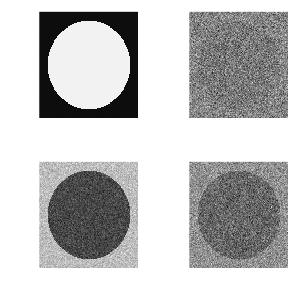

In [100]:
k = 1  # nb of singular values to keep
denoisy_img_v2_flat = mean(U_v2[:, 1:k] * Diagonal(sing_values_v2[1:k]) * V_v2[:, 1:k]', dims=2)
denoisy_img_v2 = reshape(denoisy_img_v2_flat, height, width)

mean_noisy_img_v2 = mean(array_noisy_img_v2, dims=3)[:, :, 1]

plot_denoisy_img_v2 = plot_img(denoisy_img_v2)
plot_mean_noisy_img_v2 = plot_img(mean_noisy_img_v2)
plot(plot_init_img, plot_noisy_img_v2_1, plot_denoisy_img_v2, plot_mean_noisy_img_v2, size=(300, 300))